In [ ]:
!nvidia-smi

Sun Dec 26 03:18:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, BatchNormalization, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224] 
epochs = 30
batch_size = 32

In [ ]:
train_path = '/content/drive/MyDrive/RiceDiseaseDataset/train'
valid_path = '/content/drive/MyDrive/RiceDiseaseDataset/validation'

In [ ]:
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

# useful for getting number of classes
folders = glob(train_path + '/*')

print(len(image_files))

1600


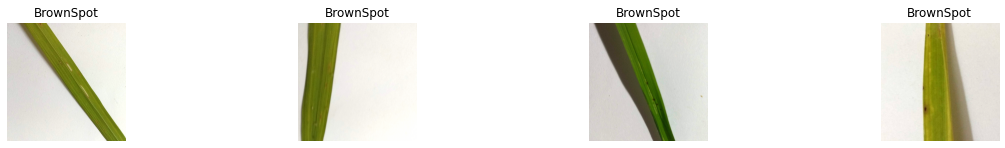

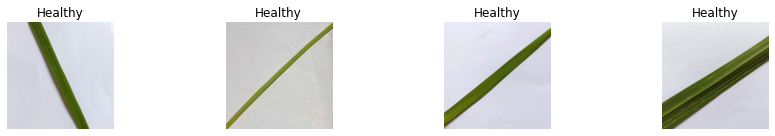

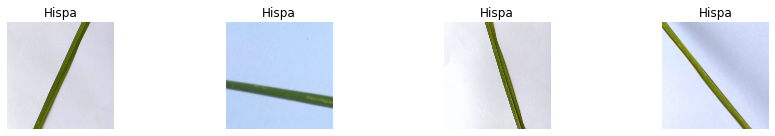

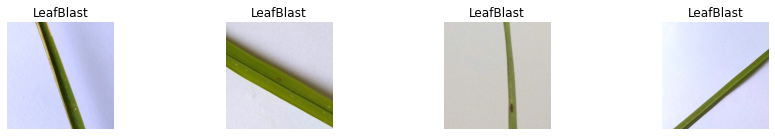

In [ ]:
import random
import os
from PIL import Image 
glass='/content/drive/MyDrive/RiceDiseaseDataset/train/BrownSpot'
images = []
for image in os.listdir(glass):
    images.append(os.path.join(glass, image))

plt.figure(1, figsize=(20, 10))
plt.axis('off')
n = 0
for i in range(4):
  n += 1
  random_img = random.choice(images)
  imgs = plt.imread(random_img)
  plt.subplot(4, 4, n)
  plt.axis('off')
  plt.imshow(imgs)
  plt.title("BrownSpot")
plt.show()
metal='/content/drive/MyDrive/RiceDiseaseDataset/train/Healthy'
images = []
for image in os.listdir(metal):
    images.append(os.path.join(metal, image))

plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
  n += 1
  random_img = random.choice(images)
  imgs = plt.imread(random_img)
  plt.subplot(4, 4, n)
  plt.axis('off')
  plt.imshow(imgs)
  plt.title("Healthy")
plt.show()
organic='/content/drive/MyDrive/RiceDiseaseDataset/train/Hispa'
images = []
for image in os.listdir(organic):
    images.append(os.path.join(organic, image))

plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
  n += 1
  random_img = random.choice(images)
  imgs = plt.imread(random_img)
  plt.subplot(4, 4, n)
  plt.axis('off')
  plt.imshow(imgs)
  plt.title("Hispa")
plt.show()
plastic='/content/drive/MyDrive/RiceDiseaseDataset/train/LeafBlast'
images = []
for image in os.listdir(plastic):
    images.append(os.path.join(plastic, image))

plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
  n += 1
  random_img = random.choice(images)
  imgs = plt.imread(random_img)
  plt.subplot(4, 4, n)
  plt.axis('off')
  plt.imshow(imgs)
  plt.title("LeafBlast")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
vgg=VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable =False
x=Flatten()(vgg.output)
x=Dense(1024, activation='relu')(x)
x=Dropout(0.2)(x)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
gen=ImageDataGenerator(rescale=1./255, rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,preprocessing_function=preprocess_input)
gen_no=ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)
test_gen=gen_no.flow_from_directory(valid_path,target_size=IMAGE_SIZE)

Found 492 images belonging to 4 classes.


In [ ]:
print(test_gen.classes[4])

0


In [ ]:
labels = [None] * len(test_gen.class_indices)
print(labels)
for k, v in test_gen.class_indices.items():
  labels[v] = k
print(labels[0])

[None, None, None, None]
BrownSpot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -0.40760395 max: 0.59239614
[0. 0. 1. 0.]


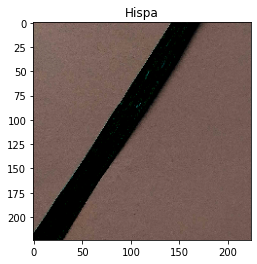

In [ ]:
for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  print(y[0])
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  break

In [ ]:
train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
  class_mode='categorical',
)
valid_generator = gen_no.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
  class_mode='categorical',
)

Found 1600 images belonging to 4 classes.
Found 492 images belonging to 4 classes.


In [ ]:
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
50/50 [==============================] - 753s 15s/step - loss: 1.6895 - accuracy: 0.3375 - val_loss: 1.2670 - val_accuracy: 0.3958
Epoch 2/30
50/50 [==============================] - 261s 5s/step - loss: 1.3263 - accuracy: 0.3494 - val_loss: 1.2675 - val_accuracy: 0.3938
Epoch 3/30
50/50 [==============================] - 260s 5s/step - loss: 1.2688 - accuracy: 0.4056 - val_loss: 1.2379 - val_accuracy: 0.3979
Epoch 4/30
50/50 [==============================] - 258s 5s/step - loss: 1.2518 - accuracy: 0.4081 - val_loss: 1.2167 - val_accuracy: 0.4104
Epoch 5/30
50/50 [==============================] - 284s 6s/step - loss: 1.2247 - accuracy: 0.4313 - val_loss: 1.2090 - val_accuracy: 0.4667
Epoch 6/30
50/50 [==============================] - 266s 5s/step - loss: 1.2111 - accuracy: 0.4294 - val_loss: 1.2254 - val_accuracy: 0.4333
Epoch 7/30
50/50 [==============================] - 260s 5s/step - loss: 1.1907 - accuracy: 0.4444 - val_loss: 1.2008 - val_accuracy: 0.4292
Epoch 8/30
5

In [ ]:
model.save("waste_categorization.h5")

In [ ]:
r=tf.keras.models.load_model('waste_categorization.h5')
r.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

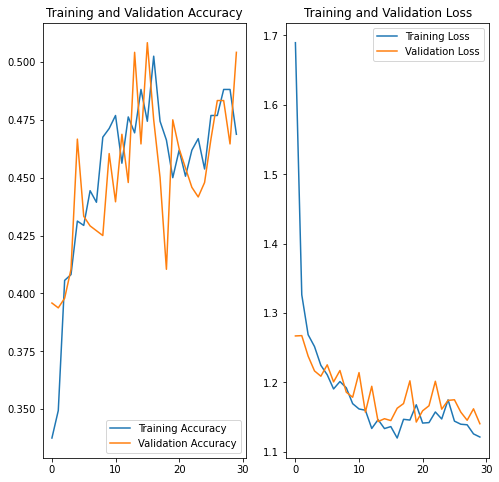

In [ ]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss =r.history['loss']
val_loss = r.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 77 kB 4.1 MB/s 


In [ ]:
!mkdir model

In [ ]:
!tensorflowjs_converter --input_format keras waste_categorization.h5 model/

In [ ]:
!zip -r model.zip model

  adding: model/ (stored 0%)
  adding: model/group1-shard2of39.bin (deflated 7%)
  adding: model/group1-shard10of39.bin (deflated 7%)
  adding: model/group1-shard20of39.bin (deflated 8%)
  adding: model/group1-shard23of39.bin (deflated 8%)
  adding: model/group1-shard19of39.bin (deflated 8%)
  adding: model/group1-shard16of39.bin (deflated 8%)
  adding: model/group1-shard35of39.bin (deflated 8%)
  adding: model/group1-shard15of39.bin (deflated 8%)
  adding: model/group1-shard1of39.bin (deflated 7%)
  adding: model/group1-shard17of39.bin (deflated 8%)
  adding: model/group1-shard13of39.bin (deflated 7%)
  adding: model/group1-shard11of39.bin (deflated 7%)
  adding: model/group1-shard30of39.bin (deflated 8%)
  adding: model/group1-shard24of39.bin (deflated 8%)
  adding: model/group1-shard4of39.bin (deflated 7%)
  adding: model/group1-shard25of39.bin (deflated 8%)
  adding: model/group1-shard22of39.bin (deflated 8%)
  adding: model/group1-shard37of39.bin (deflated 8%)
  adding: model/grou

In [ ]:
from google.colab import files
files.download('model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!apt install msttcorefonts -qq

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cabextract libmspack0 python3-chardet python3-debconf python3-debian
  python3-distro-info python3-distupgrade python3-pkg-resources python3-six
  python3-update-manager ubuntu-release-upgrader-core update-manager-core
  update-notifier-common xfonts-encodings xfonts-utils
Suggested packages:
  python3-setuptools python3-launchpadlib
The following NEW packages will be installed:
  cabextract libmspack0 python3-chardet python3-debconf python3-debian
  python3-distro-info python3-distupgrade python3-pkg-resources python3-six
  python3-update-manager ttf-mscorefonts-installer
  ubuntu-release-upgrader-core update-manager-core update-notifier-common
  xfonts-encodings xfonts-utils
0 upgraded, 16 newly installed, 0 to remove and 40 not upgraded.
Need to get 1,332 kB of archives.
After this operation, 5,3

In [ ]:
!rm ~/.cache/matplotlib -rf

16384/5616 [=======================================================================================] - 0s 0us/step
LeafBlast

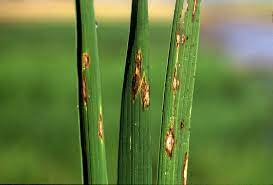

In [ ]:
import keras;
class_names=['BrownSpot','Healthy','Hispa','LeafBlast']
url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBYVFRgVFRYYGBgaGRoYHBoYGhgaGBoaGhoaHBgaGBocIS4lHB4rIRoaJjgmKy8xNTU1HCQ7QDs0Py40NTEBDAwMEA8QHhIRHjQhISQ2NjE0NDQ0NDQ0NDQ0MTQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NP/AABEIALkBEQMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAADBAIFBgEAB//EAEcQAAIBAgMBDQMKBAQGAwAAAAECAAMRBBIhMQUGEyJBUWFxgZGhscEycrIjQlJigpKiwtHwBxQVczNj4fIkNIPS4vFDU7P/xAAaAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUG/8QAKREAAgIBAwMFAAEFAAAAAAAAAAECEQMSITETMkEEIlFhcSOBkbHB0f/aAAwDAQACEQMRAD8A0K04QUBBLWhkqieM5M79giUBGkSLrVEMtURamPYYCSWWBFcSXDiLWw2CFBPcCJFa4khXETkxWjnACfKP4uUstWg3Q3mDPrPCifMP4xKCKDDnI8P9Jt6aTeRGOenH+pPDvoD0egmk3rEcL2GZTc2oCiHnVfFZotwKmWqvXbwjex58HU1+m8tPQS1hOioJj1ZHqUidpFknuFE4awj6rFSPl38YKtmwy/VqN8AEpN7wGROkk+LR3+MGIBxFFR82kT95j/2xPcD2E6ge+59Z23/EmcOZ7s+k7x9UcdKfm/Sahpkd49Wwqj3Lfimr4UTllkadHTgScEQZYnjnyI7/AEVZu4Ex0uJSb7MRlwtWxsSAn32VSO4mOOWTdFzSUWzJ7lJcoOfIp7Tr8Uvt3KYDob6lSCOYXsD23P3ZWb3lBqANblNvcAF+wgQuMqZ6jPqNAgF9LKWsR4xuXKORUoNvyDspyDYSaj9dyE86Z75emwAA2DQTOUqwfIUNwqhRs2ly7eLEdkvHeXjk4s2rVNr4SRM1JEVIBnnA031yHoQ2KsKlWJK8IrxOUh6UOcJImpAh50tI1SDSgpeczQBeRap0xapk6EOZ56VH9THOPGehqkPQipXHdMMmO6ZnleEWtI0IjrGiTH9MKN0OmZxa8IK8nQLrGiXdDpkxj+mZvh50V4tAnmZpBj+mSG6HTM2MQZ3+YMNBPXZpP6h0zGfxMrZ6FI32VCPwmP8A8wZRb9nLYdDzVfymaYY1NMTyathncVr0aZ+qvgLS+wdTK2bm1mc3t/4C+6PiImgwh446x58sUu5o53tIv6e6QIBB0OsJ/UemZutibsSqhRc2UbBrsEiMSZm8avY6OszTHdHpnDuj0zN/zJnhiY+mPrsx/wDEXEZ8Xe+ymg+I+sd3Gayp7q7fdlFvscti3H9sfgX1Jmg3LTRdNgHlOuaqCRnN3uaze9iMmbpA1l5/UemZWg5UDq5OyF/mDORxt2VDK4xo0v8AUemU++bG5qaJ9KovcoZvMCJ/zJimNrXemDzu3VbIPUxxjTscsraotNxLXzaZiLAkjQMbm+thyd07TGhPKb9pA/1lZgK2XaORR5i375xLOkdAR+wSf0EmSFPZJC+5iMuQW2tr0a83fLRqkRwrm6nt7tfWeWpNccdTZrglbbY0XkleLB4RXnZDGauQyjQymKqYZRNlhRGsODPSAWSAj6AtZwictCWnrSXgDWit4NubwnpZ5Z2LoFa0fPgJ20isIqzgs42zgkryYSeKQsCN5NWnAkkqRWB0GdnQs6UhYELyq31m+F/6q/CZbZZU76x/wv8A1V+FpeN+9BHkJvXPyC9R+Iy+w78Ydcz+9X/BXqbzMvaW0TKfe/0mXJCubOw6T5wZeTxY47dcXMpDoJmnQ94vC4YcZb7Li/VfWMdGF3RfNi3P+aR2K1h4CbHcqnxQer0mJ3Pu1Usecsetr285tNz/AGQeTSbeo2SQ5lpm0tOXkwLiRKTni9iVweBiuJe7kc1LxZqmzuWNBIg9zVqfVNNR1ZabHxLRjNLV3LVDQK5n4SlwhW45ELaHkFvIxCnieMyLqECnNbQg5iO3S/bD4qo4WmLLYU2VBxhlTM6KTr7WQK3dIKgVSADZeL3WXTvEyvZHTncePN/6D0FtfoQnvBAgQIek5KuSLcW2u32gB4QVpvgdJmWJ1ZwGEVoO0monbCZs2NUzG6cUpCNU51waMmHWSyziQgE1RLOBJ3g5MSV46FZDJ+9Z6E1noUgs+dokKiSSLCqs+bciLIBJ7LDhZ4pFqCwGWSCyRWeyw1BZwCdyyQEIohqCwJSUO/LTDr/cHwtNKVmf36j/AIcf3B5NNMMvehxe6G95mEvQViygcYAE6k5byxB43bF96jD+Ss17Gm4BHI9mykHnuBCoDZL7ciX68ombb6jb+WdGfDGONSXL5JYxeOeoeUWKx/Ercg9A9YDJHqo5k9hTLPYp8tOow2qjkdYRreNo2KUr98bZcLVPOqr951B8Ly4u5JDTtmO3DXaedlHLfl2d4m7wNMDDoLEOWZieSwYAWPKLOuvTMXuTxVuNbNfTW+Ug+Vpr8Jji6JSOoUVCDYji5aShOixVT2zT1Ft7HRCKlGTZYINnbJET1Hk6j5yZE57o5U9gdpW4Rs1Soees9upWdV8AJcUV4y32XHdfWU295SRTJ2sMx62yk/EZSftbHexpd0k+VVdtkpjvCnyYQDHNbZqeXp19I1ui4NdyCCAFHYiBfyxVwCVAFtl9nIAOS3PMojm9yZbiv1qPM+g8IGFd7ptvdtNb6AaW6ONBCaRlQlKj0lTkIVZvCZamNUo3TERpmNI87IZSk7G1nc4ihqwbVp0rIOh7hJMPK3hZIVpSyBpLLNOSv4aej6gaTNAyamKcJJq8+eo5xrNPZovnns8dAGJnA0CXnleFANBpIGARoQGKgCgyi36JfDX5nX1HrLwGVW+hM2Fq9GVu5hLxbTX6OPcjm9uov8rQViScxbLs0vUBJa/VpaPMeMev1md3uP8AJp0Kev2iPUTQXuT++S8U1U3+s2zSlSi+OR512dX785ELJOdF/fIJDNJfJzhAJnt/NTLhwo+dUUdgVj5gS9LzLb96l+AXkLMT2ZR6ma4F/Iio9yK7BDLTWw1ytpzmy28ZsMVgv5bEOls2bOwPKQWpaAfZImP4bIgPLqF2aHKTfXmIE2WCrNXenUfVluXIG0KM5IH2W06JWZtb+NzuxRvFL5YwqlXF9ljp26wjNIYmpdw30xnA97K1vGRzTn5SZwSTTo5i6hWm7DaEe3XkbL42iu5L8GEe18ihgOo/6Tu6bHgXttIRfvVEU+BMPgMMWYKoDHiGwv8AMYuy9eVDLfaaYo6pJfZau13dRbKr1Lac/FPgFi99Qei/nfykMPVzF2Pzmv3kH9Z0aE8wHJ0/7pAp87k6rAIgHOx8h6QHCSOMqG6gi1l0sdoJJB6NsXzxpGbGM8ItSJl5E1JSGiyWrCrWlRw8mteaxk0axkWjVoJq0R4eRNSaxyMvUP8ADyS1pWB5NXmqmwssOFnolwk9HrY9RSq8mrxRGhFacNHONh55nglkWaKgCmpOo8ULQiNHQx6m8MrROm0OrSWSHDRTds3w1f3PUQpeKbqtehW/tnzErGvchx5EN7djhlI2iqVPulbjxCy6w2v76JSb2bHDaHVaqnsKEeY8Zd0BZiLW2esrL3s6fUraL+h+qeKp/ewxcvCVPYB6R6xe8yOQlnmV3zvfEUl5lzdpZv0E0hMy26RzYpvqqB3BT6zfAvdf0XDkWxCEmmovrcEdByjyvN1uJismHqPYcYhF00J1ziw1HFQj7UxWJpscmW99gty5ja3jaa2nWyUkpgAhPaHIbqzEHn41+4c0M/uSX2d+BqKX2OVlIp0nIA9lBboTMvJtyBbwQeObpYVlw+HfMSrO9hboezX6tB0SuvMEtjm9VFLJsQxzcQC171KYPQMrsfFVmh3qOq1szabeixy305uKX0mbxZuKa/Sdm+4EH55Z4JAQWN9OPpf5uUAG3JCW0UTgaU1YxwyuFKi2VEU9J4x28ujLr0SIXb15e7/bJU6KqumwueuwAA84OkpJvz625Oe/XraSTklqlYpum3yhHMFH4QfWLCpJ7oNeo9tmYjsGg8oATVLYzC5oN3nIN40hnuEk0qRZpJZVFDqtDKsWpRlI7FZIictPGclxkM7PSFzPSrGUaLDqs4qwgE52SdEi4nZIwABlkgJO0kFjA7TjCQaCFEliIsYrugfka39tvCxjbQOJHyVYWBJpONeTS9x06Rx5Q1yZ/e/Rc0iy3yo6FwPosQAeq58ZqsMxJuSSdNerQeFpnN67jg6qkkBqbHboSgZlB7Vmiwv6/l2R5X7maZZaopfBYOvyF/rCIkS6poDhKp5VdLdpaVQWYxd2Y1SFyJlq+teqelh3AD8s15WY8G9Sqelz+J/0nTi8lIZppexvbIFf3rPs8u6WZe61C3Igc9QazH7paVaDZ7o+Mx2uLq4HKluwkgwkjWM6kvo2u6Va+GpoyhctRVRQdi8GzC458pAPSDKMrOe02csTc3y65V0OoHPxrQpEwSpC9RNTnaE6441Lo4Q/eyD8nhLnDOVRyPoMvN7TZZS1Na1h82mot9YvVJ8GWXaDiNbaMtgdhJJIHl3QyeDNdyCh7KptqAWHXc2P4ZGkBdByaaADYbc3VO132D6gHeP/ACk8AuaoL7FVnPUqsx29XjIXBJSVhdmPOSe8yASMBJ601sBfJOMkaCyJSOwEzTnFSOFJHJHY7I01h1kQJ0GFjCQbzuaAd40wRK89A5p6WUJAyQaBDTwaZ0SHBnbwCvJhoUAQCTUwQMnmjAKGkw0XDTuaTQgxacVb5hzo4/A0EHh8I3HHaO8EQAym95tGA+i3k81mDfYZjd7x1I6x5frNZuc11Q9C/DLzL3MqfJfUqpFJ0+a+a/vIQR4ExAGXGBpBsNVawutgDy8YuD5SjZ5zx8l5Y0o/gS8xWFb2zzhj3lz6zXM+h6pj8D7N/q+hnTiWzM1wPptHuj4pZ0Txvsj4mlZQtnXNe1he1iQM+uh2mWdNhm0+iPNtscgY9RP77YwWilM6/v6UIzzGiSFM5sQRzBV70pt+cy/pYc8GTnUXCGx22DZdeY369JQYM/LMdPaA+6qL+SaKtU+RsDcZggPLoVY9m393meR7pGkI27+EK4pwCQbaBR8NvKFwzZQ7X/8AjYc54y5Lacmu2VW7rlXCi1mdswOmYBG4o+sTa0fp3yOejTqzCFbITjST+RS05OBp4tLMzs6IPNOcJGAaDaDapBtUhQwxaDZ4EvBO8pIoZNSQZ4vmnM0pIaQa89A5p6XpGJkz2aeZZ0JMxHQZMTyJJWisDqtPM0gRONGAQPPFoNTOkwEEDRjBvx194ecTWM4Y2dTzMPOIDLbjC1Yr0sPEfpNXuYLIg6F8plMNxcU4/wAxx4t+k1mAPF6jbuJE0z8jmaXcuqvB1KZ1LIGHNcOwt06a9nTM/ml/uKgcODtQF167AEdoJmebaR0zli92jTJNSjGvCoHiHsrHmVj4GZvBLZez8ol/ug1qbn6jeRlDSNlIvzeSzqx9rMlwNoOMD9UeDiP0hqelQe7MPS8FXAtSt/8AVr18O/plhENifd/WD3BjlLb1L63knMjhzYn3T4gwqDjAdI85mxHdzyFd2YkLndiRtC8I/oBLDEYY0qqg5iKzO6sc1jZsoy81wFaB3sUzUemo2OUDHmzO7E+E0m/CjRNRCLA0mUKBykl1cdNgvhM2nbZ3YIrpv5d/2KPEoC4Ntcza8nJ3aT2IQFC2uhB02akDXvkqbE5TynW232hyXksYmWiQQQc6jXms3qIl4OJt8FWWnS0jPWlkni0gWkysgVjQ6Bs8GWkiINpQ6OM0iZ0CTCQGRAnLSYE6VmkQBWnpPLPTS0MiKcmlKMqk7lnHqELMk4EjZScyxWAkyQbCNusCyy0wAGcvJushaMKJLDIbEQKwqRMCgxaBcbUH1833gT+aaPAbG95vjMz2+AZcaD9IUz3qol/uadG1/en6zTL2p/SCfCNFuS1nbqPwypxK2dvePnLHc5uN2ekSxi8duv0nMuWZxKzdUWov7tu/SUqLoetfJZdbuaUX+z8QlSiaHs8AJ04uw08DZIJQDatPXr4Vm8ivNGmBzt7rdfLaJUhxhb6AP4wI6W2+6fKNiYZBr2axhGsQeY37tYCnsPZOPU4rn6jnuRpmwQ7uLijQCVAC2QJcDk2i/Vxhtmj3bxyV8RSKG4y5ybbLlwo7s/fKTc5RZx9UDk5UT9T22kNysKyVqmY3GlrE6DKzWH35i92zqx5UsTXn/o4PauD80jz/AEE7ukTwQ98dex/1EGNp7PH/ANxau1qQJvdqtRrnoCqAOy3fCt0c8YuScvgAknlg0aGWU2JI7kg3WHMi6wTChUpBukaCSJSPUAstOEyQypOlYagABJxkjAEG0qMgA5Z6EyzsrUFkhOkwQaezzAbCZpENBM8irx0IMwgSsLeRMaZSBMkEyRvLIFI7HQtlk0hCk4FhZLM9vs0xNM89Oke7T0l7uWdXHZ+FZR78tKlE/wCUvgzS53L2n98lvSdGXfHEU+1F/gjqvV6mBx4456h5SWEbUdnrPboDjA86jzM5fJnHkpd3T8ifeT4hKtDt7PQSz3d/wh7y+crE2Hs9J0Y+w0DUdv2R8ccIOo+qfFR+sWoDjDqHR8/nhyNTt2flEbEx2ip17PM6RNXur+4fHi+scwvtX93zMr6Q0b7A76iD1kAvJoMIbh+mw6fmDs2SyVr7NOI3JrsN/OV2ApBg92CcY25yRUUWHNpc/ZMsEXV+WyEDqOUDb0Gc0uSRGrUtnJ6PAD9DC7vKVoYNbZb0nqW5uEe4v2Ad0SxKnI3OSR8V7S3/AIiqExCIvspQQAHkGZ7TSt0dENsT+3/gzyPDo8QV4em8GiKHledJgUMKpkiOz1p0CSAisRFRPMJOQYwsCDQTQjGCaUhHrz0jPShCxacLmYo/vukaew9k36C+TWjaM06hmMGyGOzu9Ynh+xUjYhpLWYgckNT/AFieFLyVRt+SctMcvJ1yabZPT+yqNeVkCkza/rOCLQS0F37D/lz/AJbDucyy3Jvf7IPxzMbufM90+cbwPJ7q/mm8leJCktjb4MaiG3QGiH3h3EH1mVwW0dQ9I3ivZTrb0nM47mSjue3ePyYHO6+d5WIunaPSC3V9ke9+sXXYZ0QXtLaLah7X2V//AEMYsdeo/DKaltPUPjMZPL1egg0TRfYbaPs+bRGmmnWyD8Yb8sFh+XqXzMHQ2L76+TSGhxWzNLhwQLD6fqxjyP7enIB4r++yUVLYffHk0fGx/s+YnPJbkUQxKcQjpPP08vbGd+VYviLsbkU6YJPLxMxP4pWVvYPUfSE3w/8AMN7tP4Flrk6or+J/onlk6Yix2yS7O6VRmPoYwsRpQwmTAaE6Wi3LOnZEJhy0GWgm/ffBjaYyGGYyJgjywdXZGgGbT0zc9L0hR//Z"
path = tf.keras.utils.get_file('image3', origin=url)

img = keras.preprocessing.image.load_img(
    path, target_size=(224,224)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
  
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(class_names[np.argmax(score)])

16384/5658 [======================================================================================] - 0s 0us/step
BrownSpot

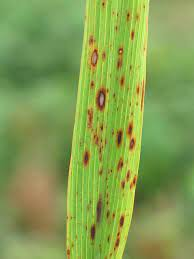

In [ ]:
import keras;
class_names=['BrownSpot','Healthy','Hispa','LeafBlast']
url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoGCBMTExcTExMXFxcXFxgXFxAXERAQEBcXFxcYGBcXFxcaHysjGhwoHxcXJDUkKCwuMjIyGSE3PDcxOysxMi4BCwsLDw4PHBERHDEfISguMTExMTExMTExMTEuMTExMTExMTExMTExMTExMTExMTExMTExMTExMTExMTExMTExMf/AABEIAQMAwgMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAADBAACBQEGB//EAEIQAAIBAgMCCwQJAgUFAQAAAAECAAMRBBIhBTEiQVFhcYGRobHB0QYTIzJCUnKCorLC4fBikrPS4vHyFCQzY3M0/8QAGQEAAwEBAQAAAAAAAAAAAAAAAQIDBAAF/8QAMBEAAgIABAMHBAICAwAAAAAAAAECEQMSIUEEMVEiMmFxgbHwkaHB0SPxYuETFDP/2gAMAwEAAhEDEQA/AH1MIpgFhVE8wxFxONJeDZpwLL55zNAl5wPOGD5p0PBiXAnUEIphVEEkMs4XkM4Bbuv84oci7df6jB7P+cS67x0jxvMXEvtV4Fo6JMy8cz5KjJYtbg33dcZYcCmOM8Y5zbynKKXDfd/VC4ga0+r859ZBvY7P/HlXUO/ynq/MJn1Rc9LN5DyjD1bIARYs4UcfExB7FvEcRUyrm3WuSebMSYyQHhtOh/CH5zzH8wj2HeyDmQnv/eZGzaoeiag3MFsem58pqYGoGW44lt4ekk1qUWHlbvY5td81BSNzFDyaZSR4zEyTd24tqaLzjuW0x7T0cDSCD5AgkgSElwJUKBhJZacIFllE4YF7udh7STgGaqy2aEtA1BGMRxmg2eccwDvOo6i7NLU2i5qSyGFHDqGFEWpNChp1DBQYRWirPK55zQGjY2cMzX+rc/zth7eA/LFdhN/5DyL439Ieq3h+gzz+I75eD7KQHCC4b7Q7ry9b5k5gD5ymEHBJ/q8AD5y1duEPs+FP9pF8yS5ExZ3C2lwexT6zNxS5kIG8rb8OsY2k7+8sPlynpvZLeJlQBcjmPjbzjVSKN5cr9QmFp5aFugWG7gj95obMw/u0ZefvufURWhUAWmh3sxNutQfCaeFGnS1/y+hk5MpKcqd7g9vH5R9rymSyzY25vHS36ZlkT0cHuIMnr6L2QHLLgTplSZU5MtOgygMteEay15JWcgFsCTBPOs8BUqR6MqK1IpWhWeUYXnUdQACESdyS4E46i6GXFSCnJwQzPKqZRYRILONvYA+HVPNbuPrBVsWDVZNOCD08m7rh9lC1E/1Nbw9IkdmAVHduO/Luzgjznn4rjnk5G3h4KUXfQcw3y/eY9yiWrj4nQCPwW85KfyC3Hm8SPKVrPwmO+97Ab9WUSNmXI+783K4wjMf5vsPKLKN/V3/7QuMe178/5mtBI4INubw/eERxbTeyKPQY4mieJabtbi1JI8Z6PAL8o5z35/UTPBt1J/lHrNHB6ZeZQewL+8Dd183stOefKuioDtk3K9Z8PSZrR/aR1X7IPaTEnE24OkEGekmgLSsu0HK5kLZJdZSdWMGy87OTk4FmW7xeo8o1SCapK0RQQNCKYsHl1qQBGJJRXnGeA46xlc0o9SCNSccNU2jFOZ9J47RMVnHo8EoFKnfje/eZmbcruUKIcrNfhcYAI79AJq6LTp8y3/DfymLtCuqVSWI0QHiG7OT5dk8+CU8bXqehwipt9A2z8V/2y1CbkLY6a5rm+7ptD7Of3gDcRUHvB8oDA4YnDovG4DW3atZrRvZ1MLweIZR0aOfSJ2baXX7E+IcdeuYS2/c0za9zvt82pN7c+sW2PSADBQwUvwQxzONw1PVDbcxGRL7vlHLqQJ3YzZgDyv3XjaqHgIr/AOu/Fo0y12foAv0lvSa9Nd/X2G/pMnDi/WyD+ds18I3C6R/PGSXMjF07M7aoCPlG5VUDqESNSG24/wAZ/u/lERzzXHkh5u5NhXaUBnCZW8eJNsJJB5pM0awWEzTsDeSdYDz9RoAvCupi7iaUAsKhllcwYMvCEMtWcerBqpl/cmCjiheUYw60Zb3UVs4FRaOUngAkZwdO7qOVgO0gRXJIK1PW4hdy8ieomLi8Ir2zjc5sQeIAd2/SbmJ+ZugeIMzGW4W+tsx6ySJ5abu0acHGeHJteI5exQDiU91MyuF+mf5op9Zxmux6G7N3nBJf3Ryn6R7OAD3XnJURabevj7mdtqh7zKvFnW/3bRnZlMIAOYnnvlv4mUxNSzAct7fzqlcFiQ1RwPo6d4j65aHWeWHWy1H8Bm945J0zXUcyrr3ibWBU5rnkFhpYbvSZWGGo6Cei5P8Ammvh25eJbn8R8pNvWxbvl4Hn9uN8d/u/kWJB5fbz/wDcVOlR+BYmrzdGPZQJaMbFSQvFg0uGjqIgUvK5oItOBoWgB80kFnknUERKxerSmq9KCajKgMg04VKcf/6eXSjDYBajSjKUYxTpRmnTgsIiaMqaM0vdyr04kmcZbU4zsinetT+1fs18p10jWxKfxl5gT3EecnJ9l+QY6tGriD855/C8wfeP79FA4GTXXjY33ce+bGLPBJ5Wby9TF6SAOptuy69AXj6phTq/UpgzUW21tRbGVQpbot+IX8J2ifhdJ8Wt5TyW38bUeqypqFFyNb2BG7sM2diBmpLULXVlAA5wzNfwlJYTjFSe5pxOHUcO29VzDVVuw7O0xXY2GNP3jH6T39PCM0qwZzbXKbHpCgwzp8MgcZ8j/miu1oZ4YjhGUHuaGCO88yDty+kM+JulQg7lIPLrTPmRA4ZQoIA3MB/aCBFKOHanSq33tV062pqIi5mnhYRbb8VX1M3a73r1D/WR2aeUAph8Yt6jnlZj+IwBE9JRpIxzdyZfNO3lEWEAhFOZZwU5eWSMAplkhpJ1HDLJBMkZeDM45C+SWRIQiVgzFMoRVEKIvnkNSARoOWg3aB95OZoGCizmObCX4hPIp8RELzQ2NuqHkA85PF0gxorcti24HTfxtLVV1bmzW6g3pB49wAt/5wjOYbHLUbg7ipIOl9bg6TDTa0HwsNu5dDyuyXUHEu+pCg677Wabmw1K4Witt63v1f6ph7R2a/vCVuFc2bkIXl7Z6j3YSnTp/VS35R5TXxGLGcIJfNjbxUlkta2KUkyu9hpYnpJ0PlGMMSSqn62h6cvpFncgmw3mxPNq1/w2647R0ZByIW7MzTKzz7tWx7CsGB+0b8xspHjL4tgyJl1DV0H4ix/JB4BQpW30iXI5Tu8FEYqUQBSCiwWoW03aI58TES1NeDJKa+dWeaZL6yhpxzLOMJ6xiTEissiwjiVDzgnQktlkDSFowDskrmEk4Aw7wbVIGo8GXispAaDzjPFw8hqRLLUWd4MvKs0oWhQrQZXlw0WBls8LJ0HzTT2aPhOeU27h6zE95N3Zq2oA/WYnsNv0mQxu6MnSsFjdWVTzd+sytiC1SoovZAVBPFqunjNbGH4nQG7QptENlixqHS7HW2o6QeqQj3WW4d1g4gwXBQ2G4sNem2kYxPzk8w0+80Rx9dU92unDKi3KS/7xiq9767gB12v5xK3I4kJRjYJVsvWO4fvGs9i3Han32Vbd8VGqjpPkIwx+ducDquT5RWSivUfwtLhq/wD67Zb6ai5PTcx7ENZD9lz2KZhez+0Pe13W/wAgK94mzjdKbH+lvxbvGCnmSfVGvGg8OaT6GDeVaQTpE9RGCwDiLu0ZqCLukYdOygqS6tBFZ1TOCGzTsDeSE4tVqQQaVeDzRGPFjAacvKK0IsWi0WdlbQirOlYwWDAlWhjAVDOokyt56jDL8GkP6Qbc5uf1TyTPPYVDlVB9UDuyzNxHJIHOIm5vUY/0k9pA84viAFGe9gBl32Fzxnuko1L5jvBC6201N/KV2jTBp2Py5s1vs2PiJCqZTh7U8r5AxQWp7q+uTIw6VW9/GHxbatbl9BM/ZJfgHfd2vruXhW7yB1xhKmbNf67DsY+kZxaddP3+ynExavohLHYxqdFXtY66E621t0/Rhti4hqmHzkasd3R/yMQ9sSfcgAfV8RpNf2XoWpUkP1SbdA/aGUY/8Wbdt+1/kfMlhqSW6f3/AET2GwxV6zsLEn1P86Z6DazfCboUfjHpPP1se1LEikg4JYhjx5ivBHd3zd26bUullHYGMXtPFjKW9P59A8Yl31un7f7McGdvAZ5ZXm9HlEeDaFJg2hHQFhKWhKhgi0KHRJJy8kIaB1DAyztKrrABBaYjCCDpLDqItF48iyicYS6iceGhmgTGK1jGKsUrvBuTkBBuQOUgds9tjfInuPpPG7NXPXpLy1E7MwJ7p7DENr0Ajm3EzNxL1QjvLfj7UZpYU0IPGVGpvpZv2hmUMqc/H0sRPP8AthWKhVHGQewX8pvbNJNOnfmN+u4kZQaipdb+xaWGo4Knev7EWNqwpppe7cugdNw5xC1VtYctz23PnOVmC1VI35Sb8wv5gQh1YD+b/wBoW9PQXFm2o+Vi+Mw3vNDxG/YZp7NpWYW+imn3iPWK0/pHo87xzZtZWDON2nYAb+Ei2/nkTjKbh4L8ieB2W7Ypqr/LfMB1jXsEe9pHIprxXe/YpHpNUDn3C34f3Ew/a59KQ56h/JbxMfCk54sb2/CL8Ri5410Rkh5BUiweTPPQsxUOCpIXieeVarCjkHqPAl4F6sqGlEhxjNJBXkhCdMvSlSJeisQeMRqmIdFg6UOogNUYHbSjiHywVRYQuApVmbipp1hMzFCciUojnsmmbFJ/TmY9SEDvInpMYDrY7gD2ZRbvmB7Gr8Wo2/LRaw5yV9JvY4fPbo/GPSYeIf8AJXh89yWLpGPqYm1sAarKTxNr0C2+a9IWyDkXwS8omqjpby9IT6Q+wfyWk5NtJPb9gnjucIw6C9ZFy5jvHBHHv/3EGranmXf2wGOZzUVAODmJJ6ANO4TlZWOYKcuhGbfYkDLpx6w5dOYVh6RV7E2lVy0SRvbQddhfxhfZZHek+fS9Sy8pGijzlq9EMEB4uF2XI8ppgilTB4lBfuZ4rl2arVsvCaWGoLVt/wBGpbTq8x6Ty/tVUvUQciX7WbyAm1snFl6IqOdCty3b3WInm/aSpeu2ugCAdSLfvvOwI1ia7WSxoONrxM4tKl4N2gmebkZxrPBs8Fnnbx4oNFgYVEgljmHSPYaJ7uSOZJJPMCxS0NSEGsMhjGrDiHQQyRem0OpnGuKDKJyos6jTlQzhqEa0z8Qs06oi1SnCZ8Qe9j6WlY/0qO3NNPGb36R4n0i/sxTtTqnlKj+dsLjG4TfaX9c8/F1xH6GPF28iijgr9+HUXc8wYd1oEDgjnDfmaFA4bfePfEfz6kt/nQWqkW621/tHlFKIPDJO9tBbdYDj/m+M1zoPvc30iPKL0QTrfQnQc9zc+HZDsPrTXzYYKXLcoVQO6/hO4iqKpqUF1IQ6bt1l/aSlqSeUju/5S2ysGRWqVb/OFAHWSfKKtLv08zRgNRTk9WuR3a1X3FCnRT5i6KbXNgTbs4M8vtHEZqjnlJ7L6T2lXBWNas+oVc4HIEQN4gz52zzRwqTt/fz/AEV4mScIxXm/NoMXlWMosIlO81UYqOrCBZwJDosYoonESP4VYvTSOYWLJCS5jVpIW4nIupIzAsuBLWklD0MNnVMMrRYmWDwGqLHFeS8XVoQNOGIwk93IDCKYWZsQ0dipam3O48jBYindmPIwt1h41sv/AMR+35CLtbh/aXTqeedPvsxYjp+n4JvVTvsG1++07TYZ3+94iVqkBByAN+ZoPZ2pqPf5rm191ykDWl/OYqXN7CeNxHxQt+I6cfzNObODA67rAgb9bsx8pif9SWxDm+gJFuKwM2cGrAlr6ZFAW27ffxEriQyRS8DRKOVV/iP4fcNPrHl/m6P4NDe99CAAOjf4xTDLa/Mv5rf5jNPDj5Oi/eT4TJNkISoD7Rvlw2Iblplf7iF/UJ8xvPo3tqbYRh9ZkX8Yb9E8DRoTfwK/jb8fwi77qO0hHMNTladGNYdJpYFFE91LU6cYVJZacKHcQWSXowzU4ICdRCSsY95JF5J2UnRJwtCEQNac0aUUd5UPAO84rxTRBjiPCo0URodGgK2MqZfNAK86zwkcQ29k1Phn7fkILNq/2l/VB7Oo5qTG5GYhd+6193PrCKoGc33su8nkblnnzrOzJjJaVzo5Vp8EDlv3uZzDqEDDkXTqZfSEdhwOkc/04tVYZSTv4usj1it6V85k43y+cjyeApfGqdLdpIm0mJPvvdDdlueTebeHfEdmUTnYkb2v1XvNL3YV83GbC/MDp4zXxErl6GmTTm14GhhKwqK5B0D5f7b3HhNii6ZrX+QcttbBfOY+HUJSGm8sxHLr+0W9gqjVGr1GN7sLclzcm3dMMsO1KXSvuNCEGpSXJchz22qA0qaj6TZv7U/1zzNGnPRe1RzVFX6qk/3E+SrMulSm7hlWEvr9QN6A0pQ9HDxilSjFNJe6AmCp0Jc04wBKPBZzYrUEWJjdWJ1I6ZJnLyQd52dYtB2EXqiOBbyNRjUVTox6qTiLNKph5QUbQNDxkLqhhVWHWnO+7itF1MDKs8YKQFSnBRObNzYv/wCcf/T0lgmjdI/XK7FI9yo4/eX8Ja5zEW0Ot+cE28550u/LzMuKnfp7IDjAQUy/WXTmz69155r2gxzCslMbrrftM9TUPCGm6x6eDmM8ntjDlsVTNtODxcmvmJbAyuXa6P2KcO9Xe1mxQpZdecekadNRzDx/3gmPj6yPW+KtMfSueoWHiRJTtsirlLQfriy25EH4rX8TG/Z7ALRQqu4ksTxk7teyZm3CCAC2UNUW9t5AN8vXpNx6vu6ea25e8C58O+Qm240t/n5NcYtYSXVv7GBtB81VjxXsOhdB4SiLF1MKjz1UsqpbCrUaSEUxZaksrzg5RsSlSDFScZ4lisBXNoo5jVWLMsohGikktlnI1C5R2kIzTSAw4jtOFsKAvQlPcR60qyxcwyYmaEoaUeAnMkDYbM5kgnpzUZICrSiZgZguAYCgOUMT4ftL0GLJcixJW99/0pmq7h1UXyWN9Ba4N9efQTZqr81t1we8+sxTVTfzc7GSSXir9xOoeEPsH/DiGIQmop0t38XoI9VPDB/oP+HEXOo6W8P3nRM6eVlg/DAtxXvxbxp3RjB0QaivxgN2b/ERVUOZW5m8vWO0qgRSx4lA0FzckaCdO0xoq2lES2hSetiKNMC6hgWPJr6Td9o6mSjbjYgdW/y75XZGHAqO1tTa/TlCAdgPZEfa6qS6oPorc9LfsB2zsPtzjHp/ZrxJJpJbIyg0sKkWUyEzewwGfeTgrRYtIDFLUh5XhVMUovGaZi7kpFmlcsKJUiWRMpkkkkhOoNQjiySTmTCJOmSSIEGZdZJIjFONB1JJIDhen8y8+b8t/KPV9x+7JJMmL3/nUpPnDy/LEz8w+wf8KIt8y9LeAkknQ5mWXeGG3jr8RL7L1Bvr8W3ZJJDi8y+Dv6fk3MD8z9I8Jg7e1rv0jwEkkHC/+j8jl3TJbfOGSSbykSjSTkk40RDUI1SkkirmLIZWQySSpJnJJJITj//Z"
path = tf.keras.utils.get_file('image4', origin=url)

img = keras.preprocessing.image.load_img(
    path, target_size=(224,224)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(class_names[np.argmax(score)])

In [ ]:
import keras;
class_names=['BrownSpot','Healthy','Hispa','LeafBlast']
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQWwVB1DDaK1Hc7RVj98HZJt1VDjx4xrADfrA&usqp=CAU"
path = tf.keras.utils.get_file('image5', origin=url)

img = keras.preprocessing.image.load_img(
    path, target_size=(224,224)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(class_names[np.argmax(score)])

16384/7284 [===================================================================] - 0s 0us/step
BrownSpot
